# Scaling of edge counts with population size

TH's plot of the edge counts $Y_{ij}$ between US state pairs and product of the population size of the state pair $n_in_j$ indicates that the scaling differs depending on whether $i=j$:
\begin{align}
Y_{ii}&\propto n_i,\\
Y_{ij}&\propto n_in_j.
\end{align}
This is also consonant with JH's plot of intra-SCI vs. population size, as normalizing the edge counts with the size of source and target region populations yields $\textrm{SCI}_{ii}\propto \frac{1}{n_i}$.
Here, we explore one mechanism by which such a scaling with population sizes might arise. Throughout this notebook, we only assume some spatial kernel $\kappa_{ij}$ for $i,j\in\mathcal{R}$, where $\mathcal{R}$ is the set of $m$ regions. (We ignore the social kernel for now, as it is not necessary for this mechanism.) That is, the likelihood of an edge between a person in regions $i$ and $j$ is given by $\kappa_{ij}$.

## Edge density and budgeting

First, we make the following observations about how the number of edges $E$ scales with the size of the network $n$.

1. If $\kappa_{ij}=O(1)$, then $E$ scales as $O(n^2)$, i.e. we have a "dense" network where the degree of every node is $O(n)$.
2. If $\kappa_{ij}=O(1/n)$, then $E$ scales as $O(n)$, i.e. we have a "sparse " network where the degree of every node is bounded $O(1)$.

For most social networks, it is reasonable to assume that the degree of nodes is bounded as the size of the network increases (imagine a social network of the entire world with billions of nodes, but nodes having bounded degrees of the order of tens to hundreds).

We model the edge counts between regions $i,j$, i.e. $Y_{ij}$, as Poisson distributed by parameter $\lambda_{ij}=\kappa_{ij}n_in_j$, where $n_i$ is the number of people in region $i$ such that the total population $n=\sum_in_i$. For the rest of the document, we will speak in terms of scaling of the expectation of $Y_{ij}$, i.e. of $\lambda_{ij}$. To obtain sparse scaling, we would have to assume
$$\kappa_{ij}\propto \frac{1}{n}=\frac{\theta_{ij}}{n},$$
where $\theta_{ij}$ is independent of $n$, which yields
$$\lambda_{ij}=\frac{\theta_{ij}n_in_j}{n},$$
such that the total (expected) number of edges in the network is
$$E=\sum_{i,j\in\mathcal{R}}\lambda_{ij}=\frac{\sum_{i,j\in\mathcal{R}}\theta_{ij}n_in_j}{n}<K\frac{\sum_{i,j\in\mathcal{R}}n_in_j}{n}=Kn,$$
i.e. $E=O(n)$ (where $K=\max(\theta_{11},\theta_{12},\cdots,\theta_{mm})$ is independent of $n$). The constant $K$ can be seen as an edge "budget": maximum number of edges a node can have in the network.

However, while this sparsity assumption gives us the correct scaling of $\kappa_{ij}\propto n_in_j$, it yields the wrong scaling of $\kappa_{ii}\propto n_i^2$. One way to rectify this is to impose sparsity via edge budgeting in appropriate subgraphs of the network, rather than in the whole network globally.

## Edge-induced subgraph
Let $P:\mathcal{R}\times\mathcal{R}\to\{1,2,\cdots,p\}$ be a mapping of region pairs to $p$ "budget partitions". $P$ can be seen as imposing a budget constraint on an edge-induced subgraph, induced by edges whose end-points lie in the region pairs mapped to $u\in\{1,2,\cdots,p\}$. Let $\mathcal{V}(u)$ refer to the set of nodes and $\mathcal{E}(u)$ refer to the set of edges in the subgraph corresponding to $u$. Then the sparsity constraint on $u$ is given by:
$$|\mathcal{E}(u)|=O(|\mathcal{V}(u)|),$$
where $|\cdot|$ indicates size.

Define the region set $R_u=\{i\in\mathcal{R} \textrm{ such that } \exists j\in\mathcal{R} \textrm{ such that } P(i,j)=u\}$ indicating the regions to which nodes in $\mathcal{V}(u)$ belong. Then the desired sparse scaling can be achieved in $u$ by setting, for $i,j\in R_u$:
$$\kappa_{ij}\propto\frac{1}{|\mathcal{V}(u)|}=\frac{\theta_{ij}}{\sum_{i\in R_u}n_i},$$
as this yields the (expected) size of the edge set:
$$|\mathcal{E}(u)|=\sum_{i,j\in R_u}\lambda_{ij}=\frac{\sum_{i,j\in R_u}\theta_{ij}n_in_j}{\sum_{i\in R_u}n_i}<K_u\frac{\sum_{i,j\in R_u}n_in_j}{\sum_{i\in R_u}n_i}=K_u|\mathcal{V}(u)|,$$
i.e. $|\mathcal{E}(u)|=O(|\mathcal{V}(u)|)$ (where $K_u=\max(\{\theta_{ij}\}_{i,j\in R_u})$ is independent of the size of the vertex set of the subgraph). The constant $K_u$ can be seen as an edge budget of the subgraph corresponding to $u$: maximum number of edges a node can have in the subgraph.

### Global edge budgeting
Considering the original setup of a global sparsity assumption is equivalent to assuming the trivial mapping $P:\mathcal{R}\times\mathcal{R}\to\{1\}$, i.e. the original graph _is_ the only induced subgraph.

### Local and global edge budgeting
Consider the first non-trivial mapping $P:\mathcal{R}\times\mathcal{R}\to\{1,2,\cdots,m,m+1\}$, such that:
1. $\forall i: P(i,i) = i$,
2. $\forall i, \forall j\ne i: P(i,j) = m+1$.

That is, we divide the graph into $m$ subgraphs corresponding to within-region edges of each of the $m$ regions, and $1$ subgraph corresponding to (all) between-region edges. Then, the sparsity constraint on each of the within-region subgraphs can be seen as a "local" edge budget, while the sparsity constraint on the between-region subgraph can be seen as a "global" edge budget. Consequently, we have:

\begin{align}
\kappa_{ii}&\propto\frac{1}{n_i}=\frac{\theta_{ii}}{n_i}\\
\implies\lambda_{ii}&=\frac{\theta_{ii}n_i^2}{n_i}=\theta_{ii}n_i
\end{align}

Thus, we obtain the required scaling of within-region edge counts as $\propto n_i$.

We remark that applying edge budgeting does not invoke spatial homophily in any explicit manner, say of the kind $\lambda_{ii}>\lambda_{ij}$. Importantly, this scaling allows us to assume a model for $\theta_{ij}$'s, which is independent of population sizes.

### Hierarchical edge budgeting
Although a local-global differentiation is sufficient to explain the observed scaling, one can consider more interesting forms of recursive edge budgeting, especially when regions are expected to form a hierarchy of $l$ levels, say county-state-country of 3 levels. Then we can impose:

1. *County-level sparsity*: for a county $i$, the constraint $\kappa_{ii}\propto\frac{1}{n_i}$,
2. *State-level sparsity*: for a county pair $i\ne j$ in the same state $u$: $\kappa_{ij}\propto\frac{1}{\sum_{i\in R_u}n_i}$,
3. *Country-level sparsity*: for a county pair $i$ in the state $u$ and $j$ in the state $v$ of the same country: $\kappa_{ij}\propto\frac{1}{n}$,

and so on for continent or global levels.

## Verifying edge count scaling

Below, we simulate local-global edge budgeting on the US counties, assuming a simple spatial kernel where $\theta_{ii}=100$ and $\theta_{ij}=10$.

In [111]:
%matplotlib inline

In [37]:
def import_synthetic_sci(datadir='dat/synthetic_sci/', spatial=True, heterogeneous=False, results=False, sum_pop=True):
    filename = 'poisson-'
    if spatial: filename += 'spatial-'
    if heterogeneous: filename += 'heterogeneous'
    else: filename += 'homogeneous'
    filename += '_usage.pkl'
    from src.utils.generic import load_obj
    import os
    out = load_obj(os.path.join(datadir, filename))
    if not results:
        for key in ['args', 'aggregate_connections', 'member_counts']: del out[key]
    if sum_pop:
        out['county_counts'] = out['county_counts'].sum(-1).sum(-1).sum(-1)
    return out

In [38]:
syn_sci = import_synthetic_sci()

In [39]:
syn_sci.keys()

dict_keys(['county_counts', 'county_coordinates', 'sci', 'fips_index'])

In [108]:
class UpperTriangleIndex(object):
    """
    Helper class to convert indices of upper triangular matrix to a flat vector representation.
    """
    def __init__(self, n, size=False):
        self.set_n(n, size)
        self.last = len(self)-1
        
    def set_n(self, n, size):
        if size:
            assert(size>0)
            import numpy as np
            tmp = np.sqrt(1+8*n)
            if tmp!=int(tmp): raise ValueError('invalid size %s'%str(n))
            tmp = int(tmp)-1
            if tmp%2: raise ValueError('invalid size %s'%str(n))
            else: self.n = int(tmp//2)
        else:
            assert(isinstance(n, int) and n>0)
            self.n = n
        
        
    def __len__(self): return self.n*(self.n+1)//2
        
    def tri_to_flat(self, i, j):
        return (i*(2*self.n-1-i))//2 + j
    
    def flat_to_tri(self, idx, i):
        return idx%((i*(2*self.n-1-i))//2)
    
    def __iter__(self):
        self._idx = -1
        return self
    
    def __next__(self):
        if self._idx<self.last:
            self._idx += 1
            return self._idx
        else:
            raise StopIteration
            
    def get_diag(self):
        idx = [False]*len(self)
        for i in range(self.n):
            idx[self.tri_to_flat(i, i)] = True
        return idx

In [136]:
def sample_spatial_ard(pop, p_self=100, p_other=10, seed=12345):
    import numpy as np
    num = len(pop)
    pop_sum = sum(pop)
    ard = np.zeros(num*(num+1)//2)
    idx = iter(UpperTriangleIndex(num))
    seed = np.random.RandomState(seed=seed)
    for i in range(num):
        ard[next(idx)] = seed.poisson(p_self*pop[i])
        for j in range(i+1, num):
            ard[next(idx)] = seed.poisson(p_other*pop[i]*pop[j]/pop_sum)
    return ard

In [137]:
spatial_ard_100_10 = sample_spatial_ard(syn_sci['county_counts'])

In [131]:
def fit_line(x, y=None, p=None):
    from scipy.optimize import curve_fit
    import numpy as np
    def foo(x, m, c): return m*x + c
    if y is not None:
        popt, pcov = curve_fit(foo, x, y)
        sigma = np.sqrt(np.diag(pcov))
        pcorr = pcov/(sigma[:, None]*sigma[None, :])
        return popt, pcorr
    elif p is not None:
        return foo(x, *p)

In [178]:
def plot_ard_by_pop(ard, pop):
    import matplotlib.pyplot as plt
    import numpy as np
    def get_line(x, y):
        log_x, log_y = np.log2(x), np.log2(y)
        p, _ = fit_line(log_x, log_y)
        log_xs = np.linspace(log_x.min(), log_x.max(), 100)
        log_ys = fit_line(log_xs, p=p)
        return 2**log_xs, 2**log_ys, p[0]
    idx = iter(UpperTriangleIndex(len(ard), size=True))
    x = np.zeros(len(idx))
    for i in range(idx.n):
        for j in range(i, idx.n):
            x[next(idx)] = pop[i]*pop[j]
    fig, ax = plt.subplots(figsize=(4, 3), dpi=180)
    idx_diag = np.array(idx.get_diag())
    colors = ['tab:blue', 'tab:red']
    x_, y_ = x[idx_diag], ard[idx_diag]
    ax.loglog(x_, y_, marker='o', linestyle='', alpha=0.5, markersize=0.5, label='Within region', c=colors[0])
    x_, y_, p = get_line(x_, y_)
    ax.loglog(x_, y_, linestyle='--', c='black', label='Slope = %.2f'%p)
    idx_ = np.logical_and(~idx_diag, ard) # prevent log(0)
    x_, y_ = x[idx_], ard[idx_]
    ax.loglog(x_, y_, marker='o', linestyle='', alpha=0.5, markersize=0.5, label='Between region', c=colors[1])
    x_, y_, p = get_line(x_, y_)
    ax.loglog(x_, y_, linestyle=':', c='black', label='Slope = %.2f'%p)
    ax.set_xlabel('$n_in_j$')
    ax.set_ylabel('ARD $Y_{ij}$')
    ax.legend()

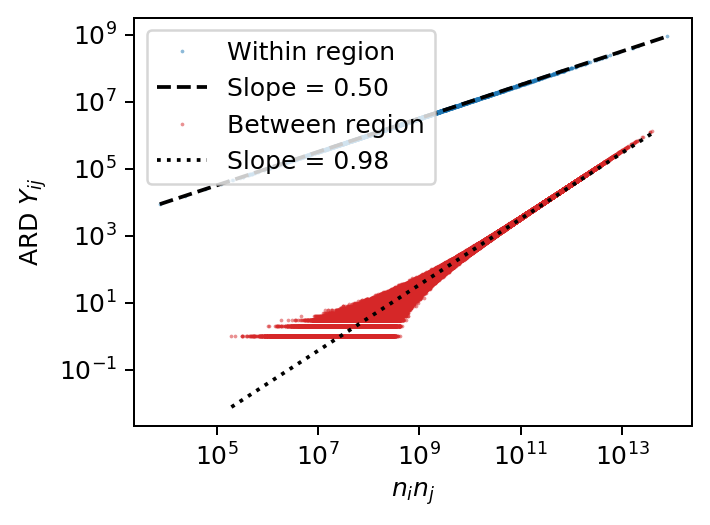

In [179]:
plot_ard_by_pop(spatial_ard_100_10, syn_sci['county_counts'])